In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r"D:\Downloadd\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
#Remove null values And creating dummies 
df=data[data!=0].dropna()
df=pd.get_dummies(df)
df.head()


,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
print('Original_data:',data.shape)
print('df_remove_NaN:',df.shape)

Original_data: (50, 5)
df_remove_NaN: (46, 7)


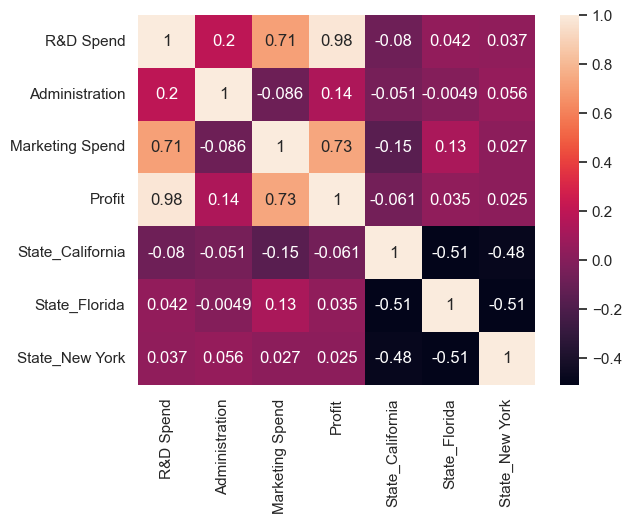

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show(sns)

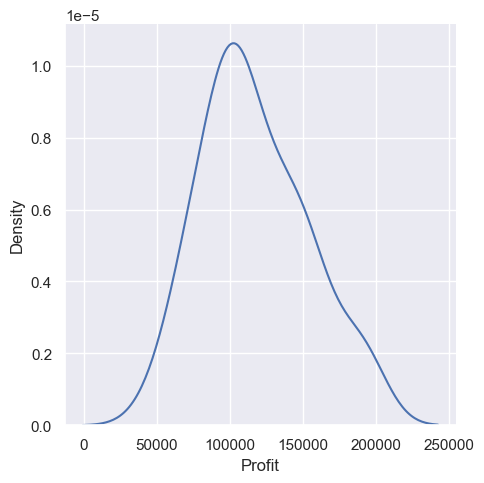

In [24]:
sns.displot(df.Profit,kind='kde')
plt.show(sns)

Boxcox Transformation on Dependent variable

In [27]:
stats.boxcox(df.Profit)

(array([144.17024351, 144.05654334, 143.87664554, 141.86796613,
        137.54758477, 135.04217492, 134.80040405, 134.69716292,
        133.70032724, 133.00074161, 131.94809916, 131.40222355,
        130.61006544, 128.40065491, 127.87137342, 127.02800569,
        126.09606029, 125.57258306, 125.21392212, 123.29441216,
        120.8306094 , 120.49186831, 119.91672189, 119.85168943,
        119.43974997, 118.83463594, 118.56994148, 117.93494021,
        117.0857023 , 116.6833476 , 115.74671449, 115.72526135,
        115.47479556, 115.44921055, 115.35884366, 113.0740187 ,
        112.76617841, 109.09494885, 108.99746929, 107.77452615,
        107.57677563, 104.66444907, 103.82957455, 101.57185066,
        101.43262284,  92.845098  ]),
 0.3155638085971519)

* Lambda=0.3155 =>Either we can apply log transformation or squareroot transformation


# Log Transformation

In [34]:
y_log=np.log(df.Profit)
x=df.drop(['Profit','R&D Spend'],axis=1)
 
import statsmodels.api as sm
x1=sm.add_constant(x)
model_log=sm.OLS(y_log,x1).fit()
model_log.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.478   
Dependent Variable: Profit           AIC:                -0.7526 
Date:               2023-05-12 10:23 BIC:                8.3906  
No. Observations:   46               Log-Likelihood:     5.3763  
Df Model:           4                F-statistic:        11.29   
Df Residuals:       41               Prob (F-statistic): 2.87e-06
R-squared:          0.524            Scale:              0.051997
-----------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
const               8.1405   0.1350 60.2871 0.0000  7.8678 8.4132
Administration      0.0000   0.0000  1.9537 0.0576 -0.0000 0.0000
Marketing Spend     0.0000   0.0000  6.5601 0.0000  0.0000 0.0000
State_California    2.7414   0.0622 44.0630 0.0000  2.6157 2.8670
State_Florida       2.6902   0.0670 40.1462 0.0000  2.5549 2.8255
State_New York      2.7089   0.0679 39.8671 0.0000  2.5716 2.8461
-----------------------------------------------------------------
Omnibus:        26.552  Durbin-Watson:     0.891                 
Prob(Omnibus):  0.000   Jarque-Bera (JB):  66.927                
Skew:           -1.462  Prob(JB):          0.000                 
Kurtosis:       8.135   Condition No.:     3017126942023893385216
=================================================================
* The condition number is large (3e+21). This might indicate
strong multicollinearity or other numerical problems.
"""

# Squareroot Transformation

In [35]:
y_sq=np.sqrt(df.Profit)
x=df.drop(['Profit','R&D Spend'],axis=1)

import statsmodels.api as sm
x1=sm.add_constant(x)
model_sq=sm.OLS(y_sq,x1).fit()
model_sq.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.516   
Dependent Variable:  Profit           AIC:                466.2763
Date:                2023-05-12 10:30 BIC:                475.4195
No. Observations:    46               Log-Likelihood:     -228.14 
Df Model:            4                F-statistic:        12.99   
Df Residuals:        41               Prob (F-statistic): 6.42e-07
R-squared:           0.559            Scale:              1334.4  
------------------------------------------------------------------
                  Coef.   Std.Err.   t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
const            156.1016  21.6311 7.2166 0.0000 112.4168 199.7864
Administration     0.0004   0.0002 2.0013 0.0520  -0.0000   0.0008
Marketing Spend    0.0004   0.0000 7.0563 0.0000   0.0003   0.0005
State_California  56.8195   9.9667 5.7010 0.0000  36.6914  76.9476
State_Florida     47.9895  10.7348 4.4705 0.0001  26.3101  69.6689
State_New York    51.2926  10.8849 4.7123 0.0000  29.3101  73.2751
------------------------------------------------------------------
Omnibus:         16.542  Durbin-Watson:     0.946                 
Prob(Omnibus):   0.000   Jarque-Bera (JB):  27.515                
Skew:            -1.015  Prob(JB):          0.000                 
Kurtosis:        6.199   Condition No.:     3017126942023893385216
==================================================================
* The condition number is large (3e+21). This might indicate
strong multicollinearity or other numerical problems.
"""

In [38]:
print('p-value for log transformation:',1-stats.f.cdf(11.29,4,41))
print('p-value for sq tarnsformation:',1-stats.f.cdf(12.99,4,41))

p-value for log transformation: 2.8717821025647794e-06
p-value for sq tarnsformation: 6.418944946684491e-07


In [42]:
print('MSE for Log Model:',np.square(np.subtract(y_log,model_log.predict())).mean())
print('MSE for Sq Model:',np.square(np.subtract(y_sq,model_sq.predict())).mean())



MSE for Log Model: 0.04634558487647111
MSE for Sq Model: 1189.3623456481996


In [64]:
import plotly.express as px
import plotly.graph_objects as go

In [70]:
fig=px.scatter_3d(df,x='Administration',y='Marketing Spend',z='Profit')
fig.show()

* Log Transformation gives less S.E. and MSE so we preffered Log Transformation insted of Sq transformation

# Dignostic Plots

In [44]:
from statsmodels.graphics.gofplots import ProbPlot
s=model_log.get_influence()

* Normal PP plot for Residual

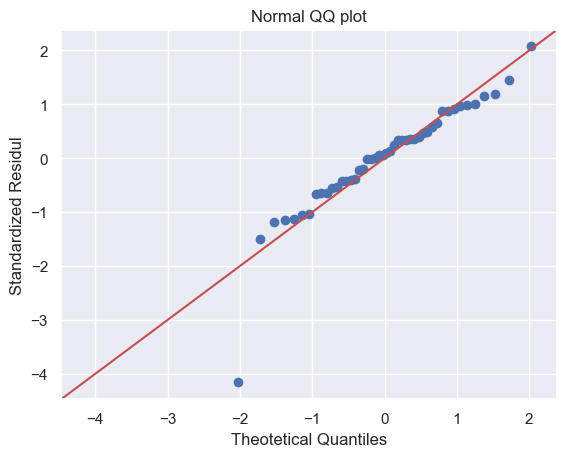

In [49]:
ProbPlot(s.resid_studentized_internal).qqplot(line='45')
plt.title('Normal QQ plot')
plt.xlabel('Theotetical Quantiles')
plt.ylabel('Standardized Residul')
plt.show()

* Fitted vs Residul Plot

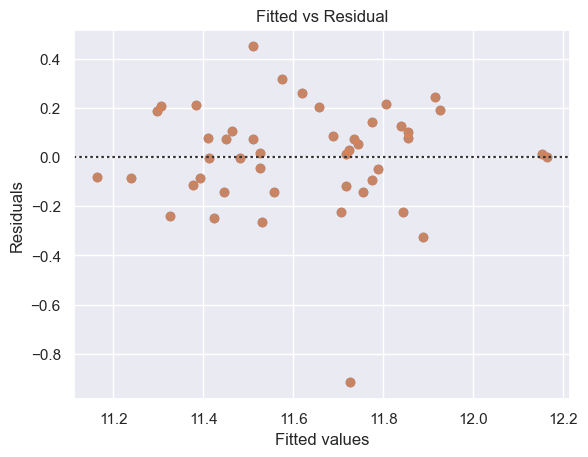

In [51]:
sns.residplot(model_log.fittedvalues,y_log)
plt.title('Fitted vs Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

* The fitted vs Residual Plot shows Homogeneity

* Residual vs Leverage Plot

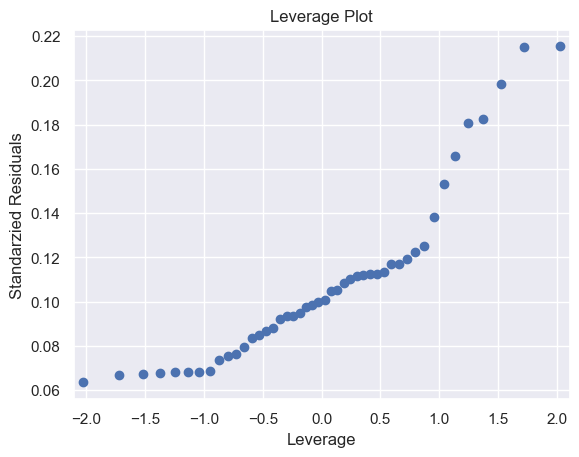

In [55]:
ProbPlot(s.hat_matrix_diag).qqplot()
plt.title('Leverage Plot')
plt.xlabel('Leverage')
plt.ylabel('Standarzied Residuals')
plt.show()

* Residual vs Influence Point

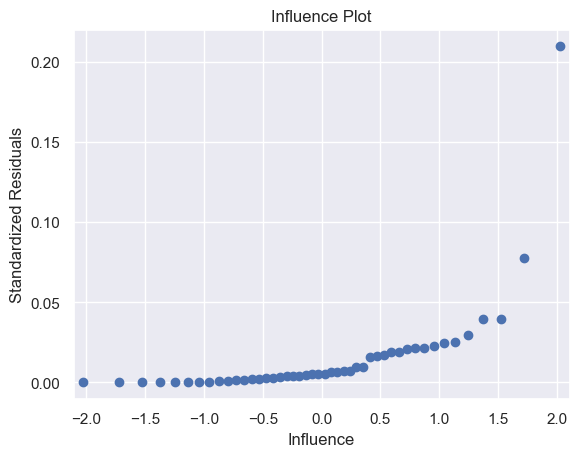

In [61]:
ProbPlot(s.cooks_distance[0]).qqplot()
plt.title('Influence Plot')
plt.xlabel('Influence')
plt.ylabel('Standardized Residuals')
plt.show()

* Scale and Location Plot 

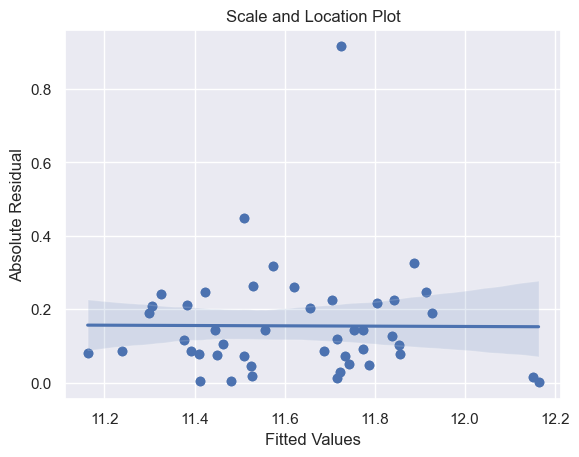

In [62]:
plt.scatter(model_log.predict(),np.abs(model_log.resid))
sns.regplot(model_log.predict(),np.abs(model_log.resid))
plt.title('Scale and Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Residual')
plt.show()